In [1]:
#import pandas numpy matplotlib seasonal decomse exponential smooth  and auto regressive integrated model average MSE
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
#read the dataset
df=pd.read_csv("churn-bigml-20.csv")  

In [4]:
#create a synthetic monthly index
df['Index'] = pd.date_range(start='2020-01-01', periods=len(df), freq='ME')
df.set_index('Index', inplace=True)

In [16]:
# aggregate total day charges
ts = df['Total day charge']

In [17]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


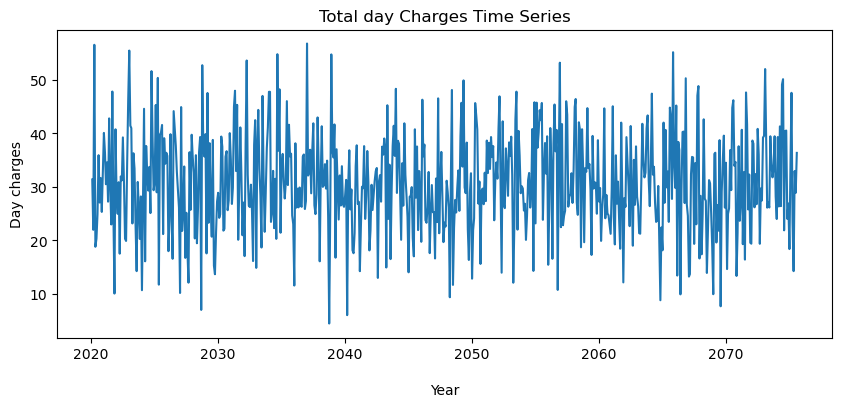

In [20]:
# Plot the Time Series
plt.figure(figsize=(10,4))
plt.plot(ts)
plt.title('Total day Charges Time Series')
plt.xlabel('\nYear')
plt.ylabel('Day charges')
plt.show()

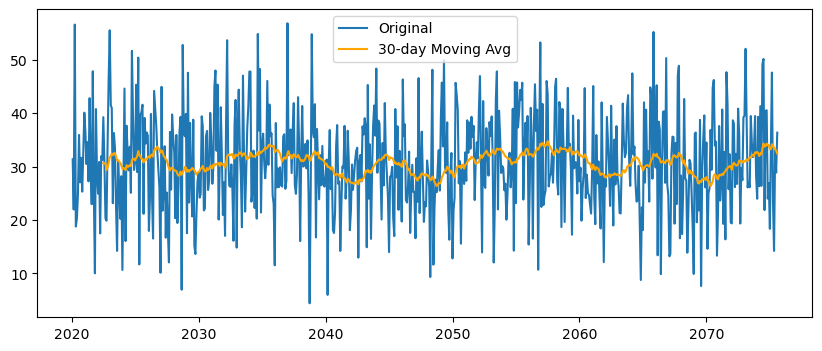

In [22]:
# Date Moving Average
window = 30
ma = ts.rolling(window=window).mean()
plt.figure(figsize=(10,4))
plt.plot(ts, label='Original')
plt.plot(ma, label=f'{window}-day Moving Avg', color='orange')
plt.legend()
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


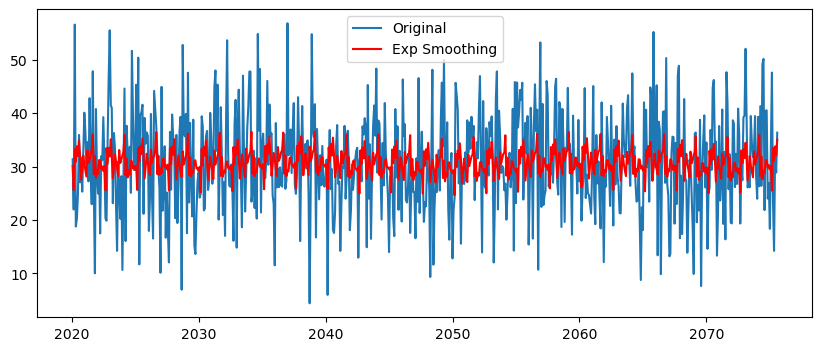

In [24]:
#Exponential Smoothing
esmodel = ExponentialSmoothing(ts, trend='add', seasonal='add', seasonal_periods=30)
esfit = esmodel.fit()
plt.figure(figsize=(10,4))
plt.plot(ts, label='Original')
plt.plot(esfit.fittedvalues, label='Exp Smoothing', color='red')
plt.legend()
plt.show()

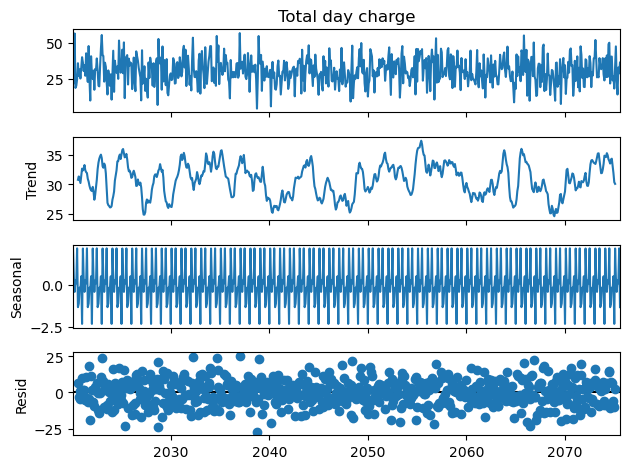

In [25]:
# Decompose
decomp = seasonal_decompose(ts, model='additive', period=12)
decomp.plot()
plt.show()

In [26]:
# Split for Train and Test
train_size = int(len(ts)*0.8)
train, test = ts.iloc[:train_size], ts.iloc[train_size:]


In [29]:
# ARIMA 
arima = ARIMA(train, order=(1,1,1))
arima_fit = arima.fit()
arima_pred = arima_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, arima_pred))
print(f'ARIMA RMSE: {rmse:.2f}')

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


ARIMA RMSE: 10.17


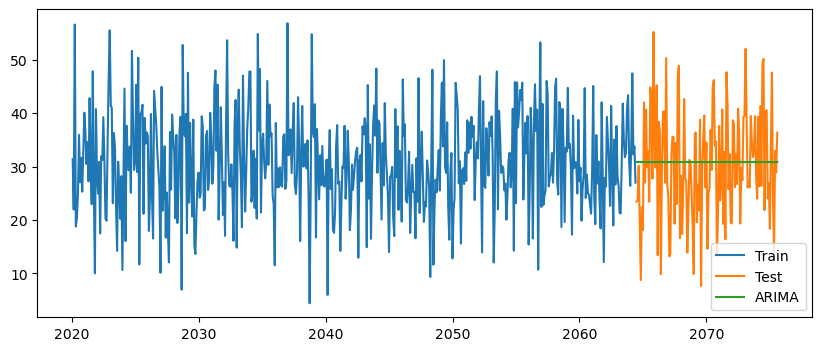

In [31]:
#Visualization ARIMA 
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, arima_pred, label='ARIMA')
plt.legend()
plt.show()

In [34]:
# SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarima = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,10))
sarima_fit = sarima.fit(disp=False)
sarima_pred = sarima_fit.forecast(steps=len(test))
rmse_sarima = np.sqrt(mean_squared_error(test, sarima_pred))
print(f'SARIMA RMSE: {rmse_sarima:.2f}')

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


SARIMA RMSE: 10.33


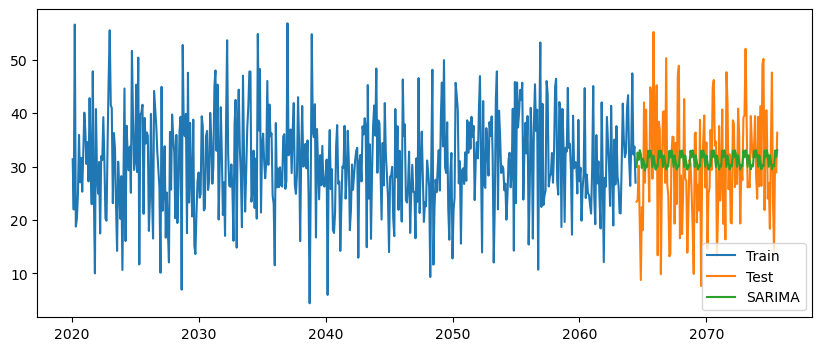

In [36]:
#Visualization of SARIMA
plt.figure(figsize=(10,4))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, sarima_pred, label='SARIMA')
plt.legend()
plt.show()